In [1]:
# Train, test splitting
# Resampling on training set 
# Training, tuning
# Predictions, eval
# Feature importance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('df_final.csv').drop(columns = ['Unnamed: 0', 'Unnamed: 0.1']).drop_duplicates().fillna(0)
data.head()

,ENCOUNTER_NUM,PATIENT_DK,gim_to_outcome,gender,med_08,med_10,med_12,med_20,med_24,med_28,...,MRP_grouped_other,MRP_grouped_palliative care,MRP_grouped_pneumonia,MRP_grouped_poisoning,MRP_grouped_seizure,MRP_grouped_sepsis,MRP_grouped_severe enteritis,MRP_grouped_stroke,MRP_grouped_syncope,MRP_grouped_uti
0,00044d6e3352,194507,4.124803,0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,00052514c30f,87670,13.624688,0,1.0,0.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,0007e6523e5d,389169,3.543426,0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,000b0e7e7ae9,412413,4.969271,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0013da1c712c,668421,2.674120,0,1.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
to_drop = ['lab_alp', 'lab_ast', 'lab_ca', 'lab_ck', 'lab_cl', 'lab_co2', 'lab_amy', 'lab_cr', 'lab_alt', 
           'lab_alb', 'vital_stemperature', 'lab_glur', 'lab_hgb', 'vital_spulse', 'vital_so2saturation', 
           'vital_sbpsystolic', 'vital_sbpdiastolic', 'lab_vtco2', 'lab_vpo2', 'lab_vph', 'lab_vpco2', 
           'lab_vlact', 'lab_urea', 'lab_tbil', 'lab_rptt', 'lab_rpt', 'lab_rinr', 'lab_po4', 'lab_plt', 
           'lab_ph', 'lab_na', 'lab_mg', 'lab_lip', 'vital_srespirations', 'lab_iwbcr', 'lab_k'] 
# Too many invalid values, no time to cleanup...

data = data.drop(columns = to_drop)

In [4]:
meds = ['med_08', 'med_10', 'med_12', 'med_20', 'med_24', 'med_28', 'med_40', 'med_48', 
        'med_56', 'med_68', 'med_72', 'med_80', 'med_86', 'med_88', 'med_92', 'med_94', 'med_sum']

for m in meds:
    data[m] = data[m].fillna(0)

In [5]:
data.isnull().sum().sum()
# data.to_csv('final_fewercols.txt', index = False)

0

In [6]:
list(data.columns)

['ENCOUNTER_NUM',
 'PATIENT_DK',
 'gim_to_outcome',
 'gender',
 'med_08',
 'med_10',
 'med_12',
 'med_20',
 'med_24',
 'med_28',
 'med_40',
 'med_48',
 'med_56',
 'med_68',
 'med_72',
 'med_80',
 'med_86',
 'med_88',
 'med_92',
 'med_94',
 'med_sum',
 'labs_numtypes',
 'labs_num',
 'consult_acute',
 'consult_addiction',
 'consult_chaplain',
 'consult_chiropodist',
 'consult_dietitian',
 'consult_gastroenterology',
 'consult_general',
 'consult_geriatric',
 'consult_occupational',
 'consult_pharmacist',
 'consult_physio',
 'consult_physiotherapist',
 'consult_physiotherapy',
 'consult_psychiatry',
 'consult_research',
 'consult_respiratory',
 'consult_social',
 'consult_speech',
 'consult_stroke',
 'consult_wound',
 'cardiac_numorders',
 'cardiac_numtypes',
 'img_ang0090',
 'resp_numorders',
 'resp_numtypes',
 'resp_ventilator',
 'transfusion_numorders',
 'transfusion_numtypes',
 'trans_transfusepackedredbloodcells',
 'radio_numorders',
 'radio_numtypes',
 'lines_numorders',
 'lines_num

In [7]:
from sklearn.impute import SimpleImputer

mean_imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
data_imp = mean_imp.fit_transform(data.drop(columns = ['ENCOUNTER_NUM', 'PATIENT_DK', 'readmit_30d']))

In [8]:
data_imp.shape

(12504, 111)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_imp, 
                                                    data.readmit_30d,
                                                    test_size = 0.2, random_state = 1)

In [10]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

from collections import Counter

print(sorted(Counter(y_train)))
print(sorted(Counter(y_resampled).items()))

[0, 1]
[(0, 9417), (1, 9417)]


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_params = {'max_depth': [3, 4, 5], 'min_samples_leaf': [10, 20]} # 'max_features'
rf = RandomForestClassifier(n_estimators = 500, n_jobs = 2, random_state = 1)

clf = GridSearchCV(estimator = rf, param_grid = rf_params, 
                   cv = 5, n_jobs = 2, scoring = 'roc_auc', verbose = 2)
clf.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:   49.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [12]:
clf.cv_results_

C:\Users\alexw\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\alexw\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\alexw\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\alexw\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([2.00390611, 1.99977708, 2.48856449, 2.67121744, 2.59091706,
        2.7989408 ]),
 'std_fit_time': array([0.00702142, 0.04988576, 0.11767576, 0.15518958, 0.03495841,
        0.1395694 ]),
 'mean_score_time': array([0.20967431, 0.22351546, 0.20639992, 0.24705157, 0.20619507,
        0.20615411]),
 'std_score_time': array([0.00520003, 0.00896177, 0.00090149, 0.04963967, 0.00063594,
        0.00026372]),
 'param_max_depth': masked_array(data=[3, 3, 4, 4, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10, 20, 10, 20, 10, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'min_samples_leaf': 10},
  {'max_depth': 3, 'min_samples_leaf': 20},
  {'max_depth': 4, 'min_samples_leaf': 10},
  {'max_depth': 4, 'min_samples_leaf': 20},
  {'max_depth': 5, 'min_s

In [13]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

In [14]:
feature_importances = pd.DataFrame(clf.best_estimator_.feature_importances_,
                                   index = data.drop(columns = ['ENCOUNTER_NUM', 'PATIENT_DK', 'readmit_30d']).columns,
                                   columns = ['importance']).sort_values('importance', ascending = False)

feature_importances

,importance
med_sum,0.113573
ADT_DISCHARGE_Home w/o Service,0.068729
ADT_DISCHARGE_Other,0.067871
labs_num,0.063176
gim_to_outcome,0.063080
MRP_grouped_other,0.060421
med_08,0.046148
med_12,0.040931
labs_numtypes,0.036894
med_20,0.029906


In [23]:
pred_probs = clf.predict_proba(X_test)

pred_labels = clf.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_labels, labels = [0, 1]) # ~62% accuracy

array([[1475,  886],
       [  73,   67]], dtype=int64)

In [25]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc

roc_auc_score(y_test, pred_probs[:, 1])

0.6028196284867188

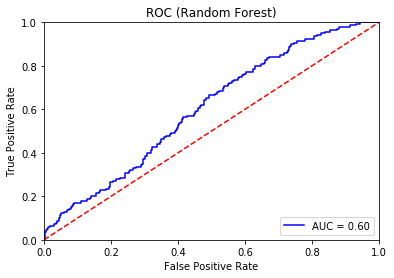

In [18]:
fpr, tpr, threshold = roc_curve(y_test, pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('ROC (Random Forest)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()